# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [5]:
import sys
print(sys.prefix)

C:\Users\yover\anaconda3


In [8]:
import torch
x=torch.randn(1,3,2,2)
print(x)

device = torch.device("xpu" if torch.xpu.is_available() else "cpu")
print(f"Using device: {device}")
torch.xpu.is_available()

tensor([[[[ 1.9142, -1.7460],
          [-0.7885, -1.3604]],

         [[ 0.1951, -0.2455],
          [ 0.8209,  0.0350]],

         [[ 0.3092, -0.2575],
          [ 1.1920,  0.9427]]]])
Using device: cpu


False

In [2]:
import torch
x = torch.randn(5,3)
print(x)

tensor([[-1.3510, -0.5074,  0.3059],
        [ 0.5403,  0.2113,  0.9134],
        [ 1.0704, -1.2816, -1.2163],
        [ 0.4099, -0.2939, -0.7283],
        [ 0.0379, -0.6763,  1.1200]])


In [4]:
import torch

# Intel GPU가 사용 가능한지 확인
device = torch.device("xpu" if torch.xpu.is_available() else "cpu")
print(f"Using device: {device}")

# 간단한 모델 생성 및 이동
model = torch.nn.Linear(10, 5)
model.to(device)

# 더미 입력 데이터 생성 및 GPU로 이동
dummy_input = torch.randn(1, 10).to(device)

# 모델 추론
with torch.no_grad():
    output = model(dummy_input)

print(output)


Using device: cpu
tensor([[ 0.4235, -0.0257,  0.2374,  0.2316, -0.3408]])


SyntaxError: invalid syntax (1912686140.py, line 1)

In [12]:
torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device(type='cpu')

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [4]:



dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"{device}")

cpu


In [52]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))  # [C, H, W] -> [H, W, C]
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)  # [0, 1] 범위로 클리핑
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 잠시 멈춤

In [56]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'C:/Users/yover/Downloads/data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

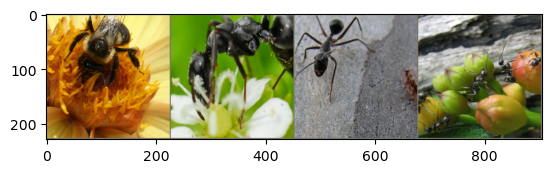

In [57]:



inputs, classes = next(iter(dataloaders['train']))
# 배치 이미지와 라벨 시각화
imshow(torchvision.utils.make_grid(inputs))

# plt.show()를 통해 그래프 창을 보이게 함
plt.ioff()
plt.show()

In [15]:
  # 정규화 되돌리기
# 데이터 로더에서 이미지 가져오기



In [20]:
for image,label in dataloaders['train']:
    

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [21]:
dataloaders['train'][0]

TypeError: 'DataLoader' object is not subscriptable

In [10]:
for i in range(3):
    image, label = dataloaders[i]
    plt.show(image)

KeyError: 0

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network
class SimpleModel(nn.Module):
    hook_handle = []
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the hook function
def _save_activation(m, i, o):
    
   
# Instantiate the model and attach the hook to a layer
model = SimpleModel()
hook_handle = model.conv1.register_forward_hook(_save_activation)
print(f"hook_handle: {hook_handle}")

# Pass some data through the model
x = torch.randn(1, 1, 28, 28)  # Example input tensor
output = model(x)

# Remove the hook
hook_handle.remove()

Layer: Conv2d
Input: (tensor([[[[-1.0316e+00, -1.3147e+00,  1.1465e+00, -2.2267e+00, -1.1316e+00,
           -6.3683e-01,  4.0611e-03,  1.0670e+00, -1.2362e+00, -6.9278e-01,
            4.9212e-01,  1.2862e+00,  6.2032e-01, -1.2882e-02, -1.0487e+00,
            6.7177e-01,  2.2272e+00,  7.6365e-01,  1.1235e-01, -8.2664e-01,
           -9.1931e-02, -1.0700e+00,  5.0188e-01,  6.0826e-01, -6.4839e-01,
           -1.9991e-01, -6.8740e-02, -4.4166e-01],
          [-5.3312e-01,  1.0421e+00, -1.1068e+00, -3.0418e-01, -6.2679e-01,
           -4.5792e-01, -6.2048e-01, -9.9833e-01, -3.8037e-01, -1.7631e+00,
           -4.5291e-01,  6.5547e-01,  9.3253e-01, -1.8510e-01, -9.4322e-01,
            1.9173e+00,  8.7365e-01,  2.4013e-01, -8.0380e-02,  1.2117e+00,
            4.0447e-01,  1.1540e-01, -1.4593e+00,  1.1067e+00, -1.1300e+00,
           -7.6159e-01, -6.4992e-01, -9.8157e-01],
          [-1.9427e+00,  6.9819e-01,  4.2586e-01,  7.9523e-01, -3.2997e-01,
            1.9179e-01, -1.2822e-01,  2.

AttributeError: 'Tensor' object has no attribute 'register_forward_hook'

In [38]:
a = (torch.randn(1,1,10,10))
class model(nn.Module):
    def __init(self):
        super().__init()
        self.layer1 = nn.Conv2d(1, 10, kernel_size=5)
        self.fc1=nn.Linear(490, 10)
    def forward(self, x):
        x= F.relu(self.layer1(x)
                  )
model = layer()
torch.nn.modules.module.register_module_forward_hook(a)

NameError: name 'm' is not defined

NameError: name 'self' is not defined